# Required Libraries

* Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

* Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt #ploting graphs
%matplotlib inline
import seaborn as sns
from collections import Counter
from IPython.display import display, HTML
from seaborn import countplot
from matplotlib.pyplot import figure, show

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DV/anime.csv',na_values=['Unknown'])
print(f"Total number of records: {len(data)}")

Total number of records: 12291


In [ ]:
print("Missing Records: ")
print(data.isnull().sum()/len(data) * 100)

Missing Records: 
anime_id    0.000000
name        0.000000
genre       0.504434
type        0.203401
episodes    2.766252
rating      1.871288
members     0.000000
dtype: float64


Only 0.5% data missing in genere, 0.2% data missing in type, 2.7% data missing in episodes, 1.8% data missing in rating. 

In [ ]:
# data after dropping records with missing data
data = data.dropna(axis = 0)
print(data.isnull().sum()/len(data) * 100)
print(f"Total number of records: {len(data)}")

anime_id    0.0
name        0.0
genre       0.0
type        0.0
episodes    0.0
rating      0.0
members     0.0
dtype: float64
Total number of records: 11827


*   Display 5 random values. 


In [ ]:
display(HTML(data.head(5).to_html()))

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51.0,9.16,151266


### Descriptive Information of Records


*   On an average there are 12 episodes per anime
*   The mean rating of all anime is around 6.4
*   Factors like name, anime_id, genre,members should not be considered in the descriptive part




In [ ]:
data.describe(include = "all")

,anime_id,name,genre,type,episodes,rating,members
count,11827.000000,11827,11827,11827,11827.000000,11827.000000,1.182700e+04
unique,NaN,11825,3217,6,NaN,NaN,NaN
top,NaN,Saru Kani Gassen,Hentai,TV,NaN,NaN,NaN
freq,NaN,2,785,3568,NaN,NaN,NaN
mean,13401.747781,NaN,NaN,NaN,12.489558,6.484107,1.851568e+04
std,11109.576098,NaN,NaN,NaN,47.102769,1.018372,5.537768e+04
min,1.000000,NaN,NaN,NaN,1.000000,1.670000,1.200000e+01
25%,3325.500000,NaN,NaN,NaN,1.000000,5.895000,2.330000e+02
50%,9819.000000,NaN,NaN,NaN,2.000000,6.570000,1.591000e+03
75%,23302.000000,NaN,NaN,NaN,12.000000,7.190000,9.840500e+03


### Rating of anime in descending order

In [ ]:
data.sort_values(by = 'rating', ascending = False).head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1.0,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
10783,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1.0,9.25,53
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262


### Members of anime in descending order




In [ ]:
data.sort_values(by = 'members', ascending = False).head(5)

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37.0,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25.0,8.54,896229
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.0,7.83,893100
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13.0,8.39,717796


### Ranking of episodes in descending order

In [ ]:
data.sort_values(by = 'episodes', ascending = False).head(10)

,anime_id,name,genre,type,episodes,rating,members
6296,12393,Oyako Club,"Comedy, Slice of Life",TV,1818.0,6.18,160
929,2471,Doraemon (1979),"Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen",TV,1787.0,7.76,14233
9243,23349,Kirin Monoshiri Yakata,Kids,TV,1565.0,5.56,116
5360,6277,Manga Nippon Mukashibanashi (1976),"Fantasy, Historical",TV,1471.0,6.48,406
6580,8213,Hoka Hoka Kazoku,Comedy,TV,1428.0,6.05,194
9242,32448,Kirin Ashita no Calendar,"Historical, Kids",TV,1306.0,6.43,59
9611,22221,Monoshiri Daigaku: Ashita no Calendar,Historical,TV,1274.0,6.80,112
10163,10241,Sekai Monoshiri Ryoko,Comedy,TV,1006.0,5.92,153
9317,20117,Kotowaza House,"Comedy, Slice of Life",TV,773.0,5.63,110
6118,9768,Shima Shima Tora no Shimajirou,"Adventure, Comedy, Fantasy, Kids, Magic",TV,726.0,6.25,237


# Visual Analysis

# Histograms



*   A histogram is a graphical representation of data points organized into user-specified ranges.



### Plot 1


*   Mean is a good estimate of the overall population for rating. 





(array([   5.,   27.,  184.,  478., 1220., 2557., 3809., 2652.,  813.,
          82.]),
 array([1.67, 2.44, 3.21, 3.98, 4.75, 5.52, 6.29, 7.06, 7.83, 8.6 , 9.37]),
 <BarContainer object of 10 artists>)

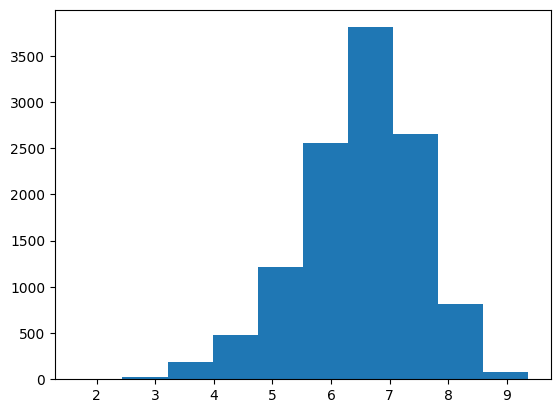

In [ ]:
plt.hist(data.rating)

### Plot 2


*   In members, we can see that there's certain anime for which there are a lot of members and for many of them, there's very few members.

(array([1.1288e+04, 3.2800e+02, 1.1300e+02, 4.9000e+01, 2.0000e+01,
        1.6000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([1.200000e+01, 1.014025e+05, 2.027930e+05, 3.041835e+05,
        4.055740e+05, 5.069645e+05, 6.083550e+05, 7.097455e+05,
        8.111360e+05, 9.125265e+05, 1.013917e+06]),
 <BarContainer object of 10 artists>)

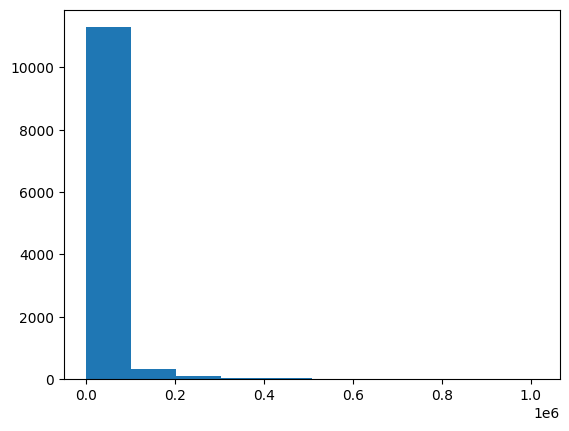

In [ ]:
plt.hist(data.members)

*  In plot 1 the rating is well defined since the standard deviation is less comparitive what we analyse in the plot 2. 

# Barcharts

Text(0.5, 0, 'Series Type')

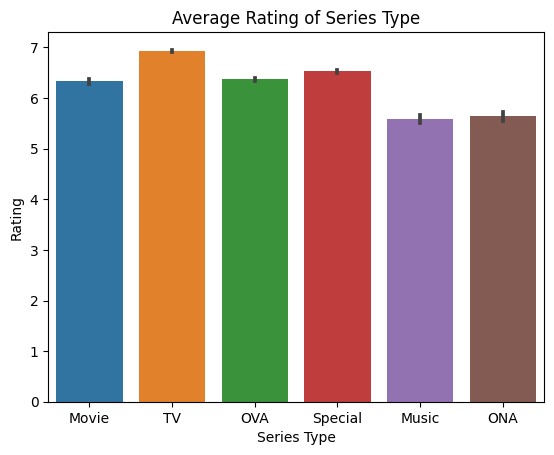

In [ ]:
plt.title("Average Rating of Series Type")
sns.barplot(x=data.type, y=data.rating)
plt.ylabel("Rating")
plt.xlabel("Series Type")

Text(0.5, 0, 'Series Type')

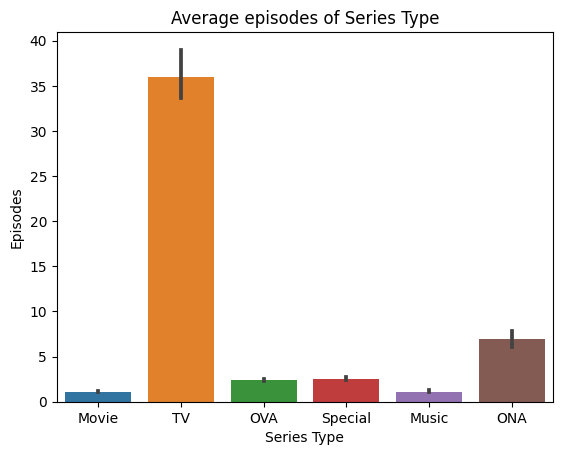

In [ ]:
plt.title("Average episodes of Series Type")
sns.barplot(x=data.type, y=data.episodes)
plt.ylabel("Episodes")
plt.xlabel("Series Type")

# Boxplot



*   Boxplot is a compressed version of histogram where you come to know about the median and quartiles. 

* Finding out quartiles and confirming that most of the data lies within the IQR and the whiskers. Those that lie outside these range are potential outliers, they need to be investigated and if found alright, they will be considered in future analysis, else these records are blocked. 

<img src="https://flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif">


<Axes: xlabel='type', ylabel='rating'>

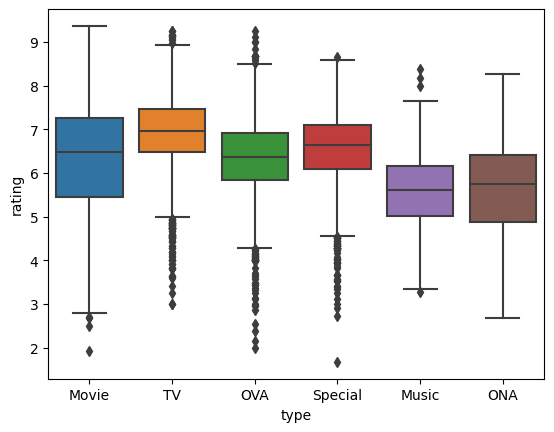

In [ ]:
sns.boxplot(y = 'rating',x='type',data=data)

In [ ]:
data[(data.type == "Movie") & (data.episodes > 1)]

,anime_id,name,genre,type,episodes,rating,members
63,21899,Gintama: Yorinuki Gintama-san on Theater 2D,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,2.0,8.60,11104
411,1689,Byousoku 5 Centimeter,"Drama, Romance, Slice of Life",Movie,3.0,8.10,324035
783,1462,Memories,"Drama, Horror, Psychological, Sci-Fi",Movie,3.0,7.84,38643
1370,1911,Top wo Nerae! &amp; Top wo Nerae 2! Gattai Mov...,"Comedy, Mecha, Shounen",Movie,2.0,7.57,8079
1968,3508,Genius Party,"Action, Dementia, Fantasy, Mecha, Music, Psych...",Movie,7.0,7.39,18612
1969,6795,Genius Party Beyond,"Dementia, Fantasy, Music, Sci-Fi",Movie,5.0,7.39,10660
2418,27539,Pikmin Short Movies,"Fantasy, Kids",Movie,3.0,7.27,406
2546,2962,Digimon Adventure 02 Movies,"Adventure, Fantasy, Kids, Sci-Fi",Movie,2.0,7.23,26543
3259,1951,Manie-Manie: Meikyuu Monogatari,"Adventure, Fantasy, Horror, Sci-Fi, Supernatural",Movie,3.0,7.04,9568
3703,2611,Panda Kopanda,"Comedy, Kids",Movie,2.0,6.91,4922


# Violinplot

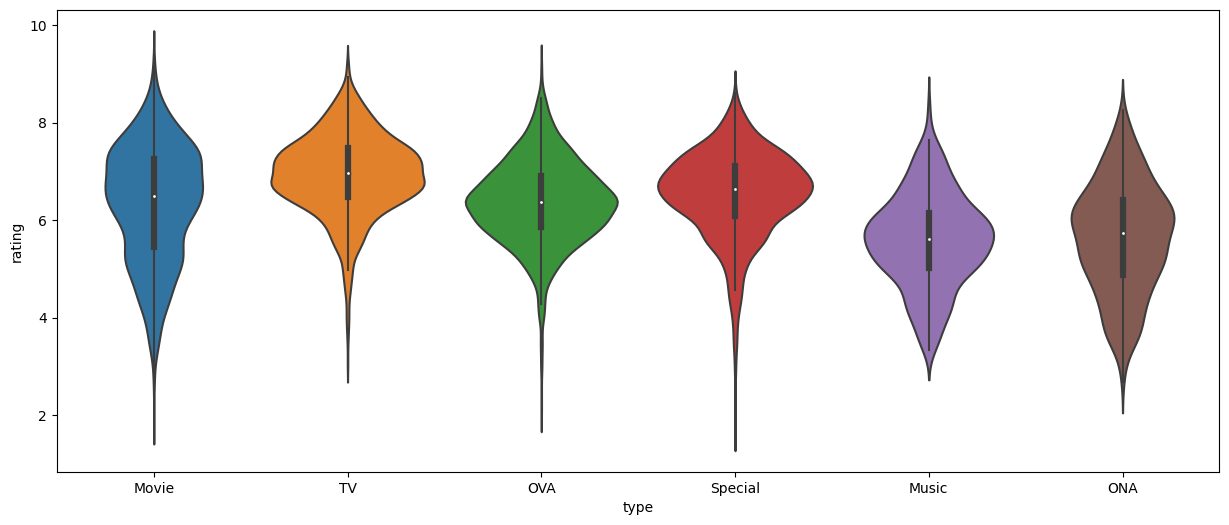

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 6))
sns.violinplot(y = 'rating', x = 'type', data = data, ax = ax);

# Scatterplots

<Axes: xlabel='type', ylabel='members'>

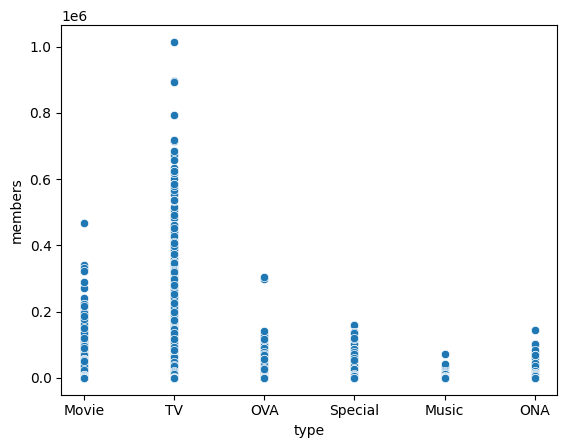

In [ ]:
sns.scatterplot(x=data['type'], y=data['members'])

<Axes: xlabel='rating', ylabel='members'>

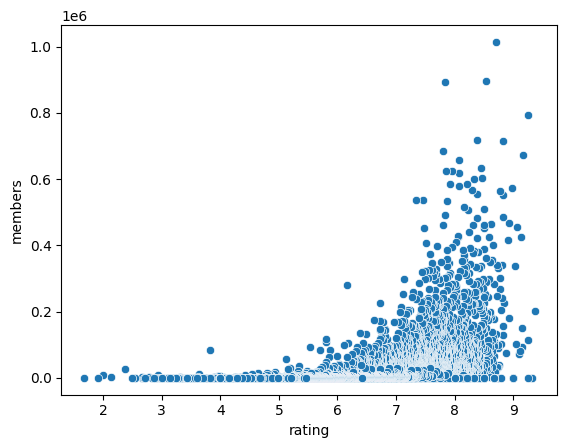

In [ ]:
sns.scatterplot(x=data['rating'], y=data['members'])

<Axes: xlabel='rating', ylabel='episodes'>

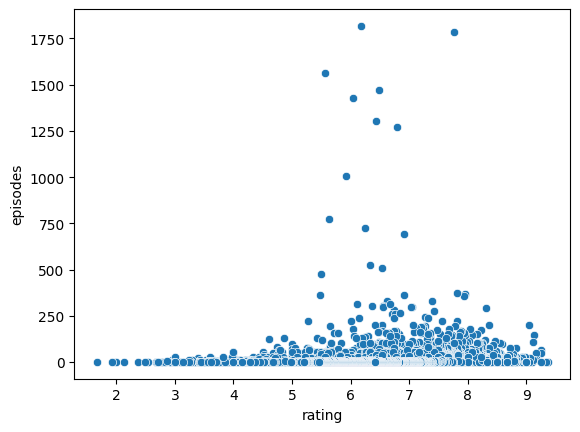

In [ ]:
sns.scatterplot(x=data['rating'],y=data['episodes'])

## Genre Relation Visualization

In [ ]:
all_genres = []
for item in data.genre:
    item = item.strip().split(', ')
    all_genres.extend(item)

print(all_genres)


['Drama', 'Romance', 'School', 'Supernatural', 'Action', 'Adventure', 'Drama', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Shounen', 'Sci-Fi', 'Thriller', 'Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Shounen', 'Comedy', 'Drama', 'School', 'Shounen', 'Sports', 'Action', 'Adventure', 'Shounen', 'Super Power', 'Drama', 'Military', 'Sci-Fi', 'Space', 'Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Shounen', 'Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Shounen', 'Drama', 'Fantasy', 'Romance', 'Slice of Life', 'Supernatural', 'Drama', 'School', 'Shounen', 'Action', 'Comedy', 'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Shounen', 'Action', 'Drama', 'Mecha', 'Military', 'Sci-Fi', 'Super Power', 'Comedy', 'Drama', 'School', 'Shounen', 'Sports', 'Adventure', 'Drama', 'Supernatural', 'Drama', 'Music', 'Romance', 'School', 'Shounen', 'Adventure', 'Fantasy', 'Historical', 'M

['Action' 'Adventure' 'Cars' 'Comedy' 'Dementia' 'Demons' 'Drama' 'Ecchi'
 'Fantasy' 'Game' 'Harem' 'Hentai' 'Historical' 'Horror' 'Josei' 'Kids'
 'Magic' 'Martial Arts' 'Mecha' 'Military' 'Music' 'Mystery' 'Parody'
 'Police' 'Psychological' 'Romance' 'Samurai' 'School' 'Sci-Fi' 'Seinen'
 'Shoujo' 'Shoujo Ai' 'Shounen' 'Shounen Ai' 'Slice of Life' 'Space'
 'Sports' 'Super Power' 'Supernatural' 'Thriller' 'Vampire' 'Yaoi' 'Yuri']
[2748 2293   71 4481  238  287 1972  627 2219  170  312 1099  787  360
   52 1550  742  258  927  415  832  482  396  194  226 1436  145 1164
 2028  530  587   54 1669   62 1179  376  527  445  993   86  100   37
   41]


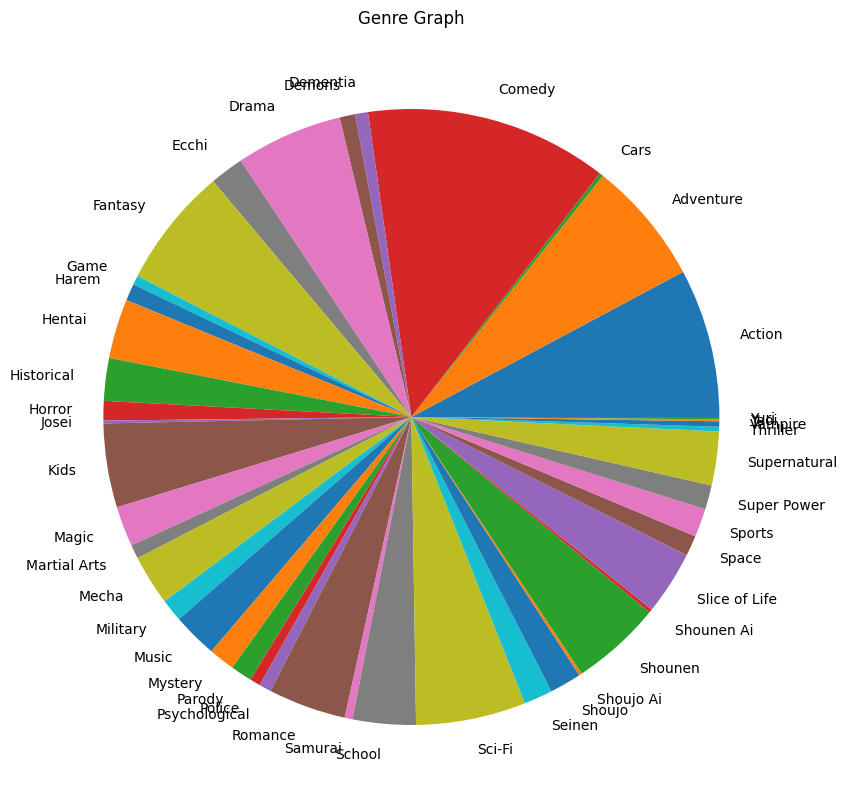

In [ ]:
unique,counts = np.unique(all_genres,return_counts=True)
print(unique)
print(counts)
plt.figure(figsize=(10,10))
plt.pie(counts,labels=unique)
plt.title('Genre Graph')
plt.show()

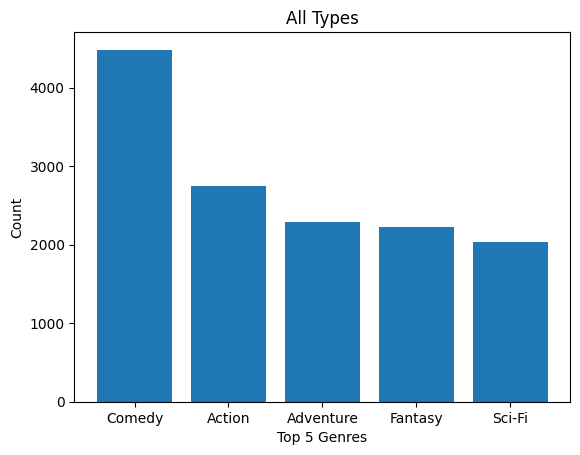

In [ ]:
top_indices = np.argsort(counts)[::-1][:5]
top_values = counts[top_indices]

top_unique = unique[top_indices]
plt.bar(top_unique,top_values)
# set the x-axis and y-axis labels
plt.xlabel('Top 5 Genres')
plt.ylabel('Count')

# set the plot title
plt.title('All Types')

# show the plot
plt.show()

       anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
8         15335  Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...   
11        28851                                     Koe no Katachi   
15          199                      Sen to Chihiro no Kamikakushi   
18        12355                       Ookami Kodomo no Ame to Yuki   
...         ...                                                ...   
11735      3038                            Senya Ichiya Monogatari   
11802      2755                                          Cleopatra   
12241     11141                                       Blue Seagull   
12255     20007                      Hi Gekiga Ukiyoe Senya Ichiya   
12290     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type  episodes  \
0                   Drama, Romance, School, Supernatural  Movie       1.0   
8    

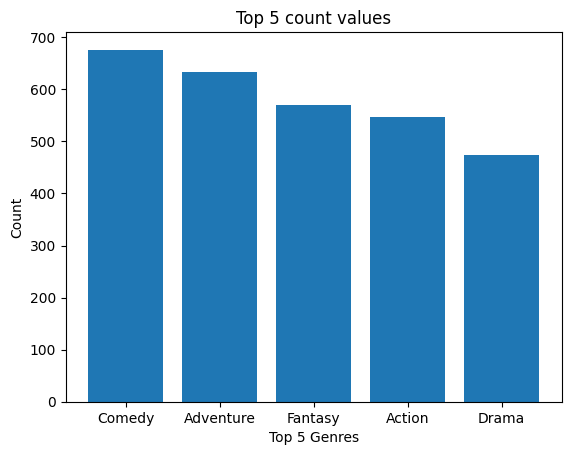

In [ ]:
movies_df = data[data['type']=='Movie']
print(movies_df)

movie_genres = []
for item in movies_df.genre:
    item = item.strip().split(', ')
    movie_genres.extend(item)

print(movie_genres)

unique,counts = np.unique(movie_genres,return_counts=True)
print(unique)

top_indices = np.argsort(counts)[::-1][:5]
top_values = counts[top_indices]

top_unique = unique[top_indices]
plt.bar(top_unique,top_values)
# set the x-axis and y-axis labels
plt.xlabel('Top 5 Genres')
plt.ylabel('Count')

# set the plot title
plt.title('Top 5 count values')

# show the plot
plt.show()

       anime_id                                               name  \
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
5         32935  Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...   
...         ...                                                ...   
10876     31698                                    Zhan Long Si Qu   
10879     31427                                              Zinba   
10886     13167                                           Zoobles!   
10889      7808                   Zukkoke Knight: Don De La Mancha   
10892     13455                                   Zumomo to Nupepe   

                                                   genre type  episodes  \
1      Action, Adventure, Drama, Fantasy, Magic, Mili...   TV      64.0   
2      Ac

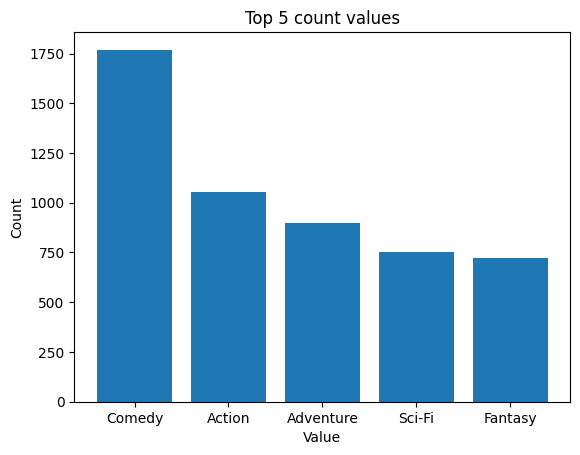

In [ ]:
TV_df = data[data['type']=='TV']
print(TV_df)

TV_genres = []
for item in TV_df.genre:
    item = item.strip().split(', ')
    TV_genres.extend(item)

print(TV_genres)

unique,counts = np.unique(TV_genres,return_counts=True)
print(unique)

top_indices = np.argsort(counts)[::-1][:5]
top_values = counts[top_indices]

top_unique = unique[top_indices]
plt.bar(top_unique,top_values)
# set the x-axis and y-axis labels
plt.xlabel('Value')
plt.ylabel('Count')

# set the plot title
plt.title('Top 5 count values')

# show the plot
plt.show()

       anime_id                                               name  \
7           820                               Ginga Eiyuu Densetsu   
21           44  Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...   
41        32366                         Gintama°: Aizome Kaori-hen   
52        30709                   Kamisama Hajimemashita: Kako-hen   
66          777                                  Hellsing Ultimate   
...         ...                                                ...   
12285      5541                                   The Satisfaction   
12286      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12287      5543                                        Under World   
12288      5621                     Violence Gekiga David no Hoshi   
12289      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   

                                                   genre type  episodes  \
7                         Drama, Military, Sci-Fi, Space  OVA     110.0   
21     Ac

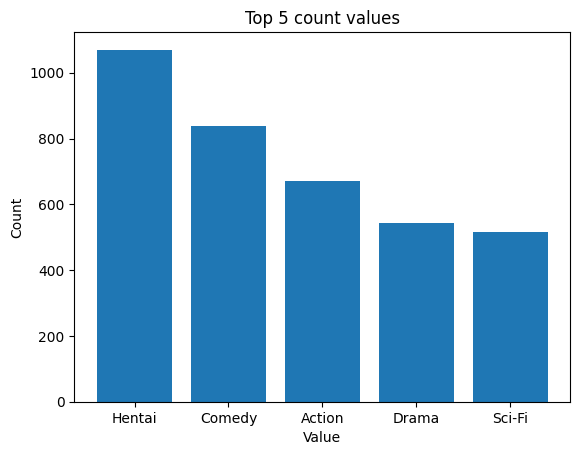

In [ ]:
OVA_df = data[data['type']=='OVA']
print(OVA_df)

OVA_genres = []
for item in OVA_df.genre:
    item = item.strip().split(', ')
    OVA_genres.extend(item)

print(OVA_genres)

unique,counts = np.unique(OVA_genres,return_counts=True)
print(unique)

top_indices = np.argsort(counts)[::-1][:5]
top_values = counts[top_indices]

top_unique = unique[top_indices]
plt.bar(top_unique,top_values)
# set the x-axis and y-axis labels
plt.xlabel('Value')
plt.ylabel('Count')

# set the plot title
plt.title('Top 5 count values')

# show the plot
plt.show()

       anime_id                                               name  \
48        21329                       Mushishi Special: Hihamukage   
85        24687                 Mushishi Zoku Shou: Odoro no Michi   
126       10863              Steins;Gate: Oukoubakko no Poriomania   
162         264                      Hajime no Ippo: Champion Road   
171        6945                         Gintama: Shiroyasha Koutan   
...         ...                                                ...   
12038     10409          Kyouhaku: Owaranai Ashita - Special Stage   
12091      6328  Bondage Game: Shinsou no Reijoutachi - Shinsou...   
12119     31283                            Bikini Warriors Special   
12183      9851                                      O-parts: Oman   
12261     32195                   Junjou Shoujo Et Cetera Specials   

                                                   genre     type  episodes  \
48     Adventure, Fantasy, Historical, Mystery, Seine...  Special       1.0   
8

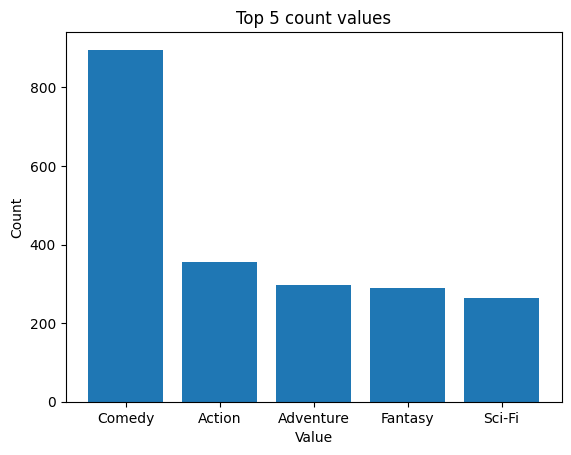

In [ ]:
Special_df = data[data['type']=='Special']
print(Special_df)

Special_genres = []
for item in Special_df.genre:
    item = item.strip().split(', ')
    Special_genres.extend(item)

print(Special_genres)

unique,counts = np.unique(Special_genres,return_counts=True)
print(unique)

top_indices = np.argsort(counts)[::-1][:5]
top_values = counts[top_indices]

top_unique = unique[top_indices]
plt.bar(top_unique,top_values)
# set the x-axis and y-axis labels
plt.xlabel('Value')
plt.ylabel('Count')

# set the plot title
plt.title('Top 5 count values')

# show the plot
plt.show()

       anime_id                                               name  \
169       34240                                            Shelter   
336         731  Interstella5555: The 5tory of The 5ecret 5tar ...   
533       17949                       The Everlasting Guilty Crown   
1178       2768                              CLAMP in Wonderland 2   
1267       9930                                      Snow Halation   
...         ...                                                ...   
10805     33908                                         Yasoukyoku   
10812     29970                                               Yell   
10834     30169                                           Yubikiri   
10838     31872                                  Yukidaruma Kazoku   
10852     32850                                       Yuu no Mahou   

                                                   genre   type  episodes  \
169                                        Music, Sci-Fi  Music       1.0   
336  

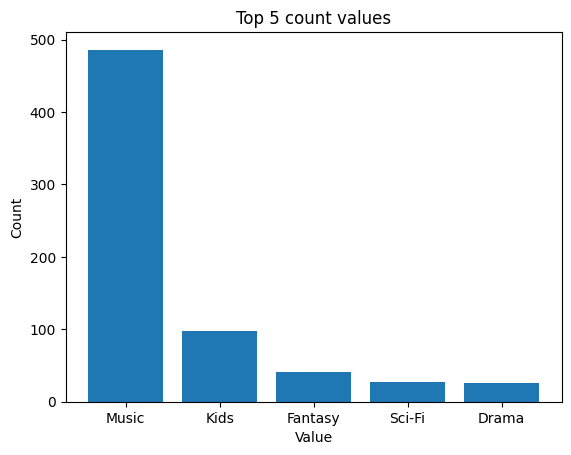

In [ ]:
Music_df = data[data['type']=='Music']
print(Music_df)

Music_genres = []
for item in Music_df.genre:
    item = item.strip().split(', ')
    Music_genres.extend(item)

print(Music_genres)

unique,counts = np.unique(Music_genres,return_counts=True)
print(unique)

top_indices = np.argsort(counts)[::-1][:5]
top_values = counts[top_indices]

top_unique = unique[top_indices]
plt.bar(top_unique,top_values)
# set the x-axis and y-axis labels
plt.xlabel('Value')
plt.ylabel('Count')

# set the plot title
plt.title('Top 5 count values')

# show the plot
plt.show()

       anime_id                                     name  \
246        3167                             Eve no Jikan   
409        6505                           There She Is!!   
421       32613                         Elsword: El Lady   
532       31973           Mobile Suit Gundam Thunderbolt   
547       15195             Hetalia: The Beautiful World   
...         ...                                      ...   
10883     32557  Zombie Clay Animation: I&#039;m Stuck!!   
10885     30090                              Zombie Ehon   
11827     17371                             Natsuyasumi.   
12043      5101                           Doutei Kawaiya   
12211     30663                           Docchi mo Maid   

                                               genre type  episodes  rating  \
246                            Sci-Fi, Slice of Life  ONA       6.0    8.26   
409                                  Comedy, Romance  ONA       5.0    8.11   
421                                  Actio

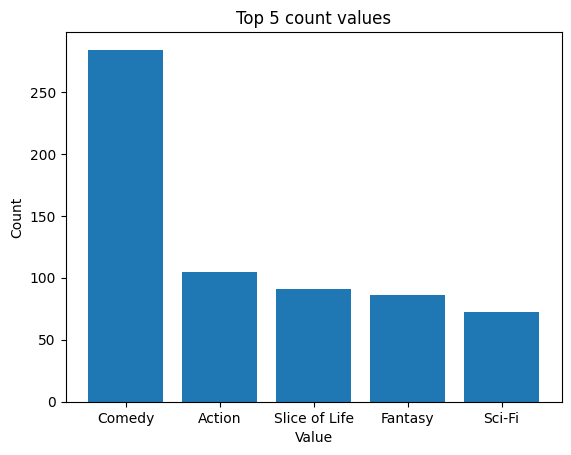

In [ ]:
ONA_df = data[data['type']=='ONA']
print(ONA_df)

ONA_genres = []
for item in ONA_df.genre:
    item = item.strip().split(', ')
    ONA_genres.extend(item)

print(ONA_genres)

unique,counts = np.unique(ONA_genres,return_counts=True)
print(unique)

top_indices = np.argsort(counts)[::-1][:5]
top_values = counts[top_indices]

top_unique = unique[top_indices]
plt.bar(top_unique,top_values)
# set the x-axis and y-axis labels
plt.xlabel('Value')
plt.ylabel('Count')

# set the plot title
plt.title('Top 5 count values')

# show the plot
plt.show()